<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [241]:
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams #нужно для запуска команды для увеличения размера графиков
import seaborn as sns

In [242]:
rcParams['figure.figsize'] = 13,6 #увеличиваем размер графиков

In [3]:
pd.set_option('display.max_rows', 500)#увеличиваем размер отображаемого Data Frame в окне  (чтобы не было сокращений)

In [247]:
wine = pd.read_csv('Data\wineQualityReds.csv', index_col=0)
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Переименуем колонки в нашем data frame**

In [248]:
wine = wine.rename(columns={'fixed.acidity': 'Фикс. кислотность', 'volatile.acidity': 'Летучая кислотность', 'citric.acid': 'Лимонная кислота', 
                        'residual.sugar': 'Остаточный сахар', 'chlorides': 'Хлориды', 'free.sulfur.dioxide': 'Свободный диоксид серы', 
                        'total.sulfur.dioxide': 'Общий диоксид серы', 'density': 'Плотность воды', 'pH': 'Кислотность (pH)',
                        'sulphates': 'Сульфаты', 'alcohol': 'Содержание алкоголя', 'quality': 'Качество'})
wine.head()

,Фикс. кислотность,Летучая кислотность,Лимонная кислота,Остаточный сахар,Хлориды,Свободный диоксид серы,Общий диоксид серы,Плотность воды,Кислотность (pH),Сульфаты,Содержание алкоголя,Качество
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [225]:
wine.describe()

,Фикс. кислотность,Летучая кислотность,Лимонная кислота,Остаточный сахар,Хлориды,Свободный диоксид серы,Общий диоксид серы,Плотность воды,Кислотность (pH),Сульфаты,Содержание алкоголя,Качество
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Начнем эксперименты**

***Попробуем оценить, как зависят друг от друга показатели фиксированной кислотности и качества (оценок) вина***

In [249]:
wine_fixed_acids = wine[['Фикс. кислотность', 'Качество']].groupby('Качество').median()
wine_fixed_acids.reset_index().head(6)

,Качество,Фикс. кислотность
0,3,7.50
1,4,7.50
2,5,7.80
3,6,7.90
4,7,8.80
5,8,8.25


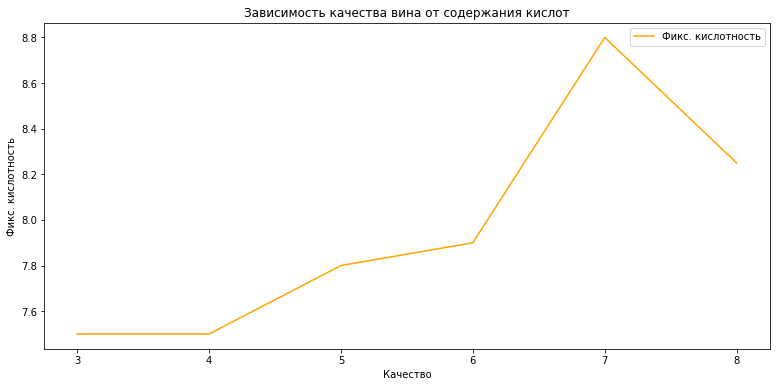

In [250]:
wine_fixed_acids.plot(title='Зависимость качества вина от содержания кислот',
                     xlabel='Качество',
                     ylabel='Фикс. кислотность',
                     color='orange')

**Лимонная кислота**

Лимонная кислота - это то,что придает вкусу белого вина ощущение свежести, фруктовости и легкости (именно поэтому охлажденные белые вина часто пьют в жару). 

Попробуем оценить, есть ли взаимосвязь между  уровнем алкоголя и количеством лимонной кислоты

In [251]:
wine_acids = wine[['Содержание алкоголя', 'Лимонная кислота']].groupby('Лимонная кислота').median()
wine_acids.head()

,Содержание алкоголя
Лимонная кислота,
0.00,10.1
0.01,10.8
0.02,10.3
0.03,10.1
0.04,9.6


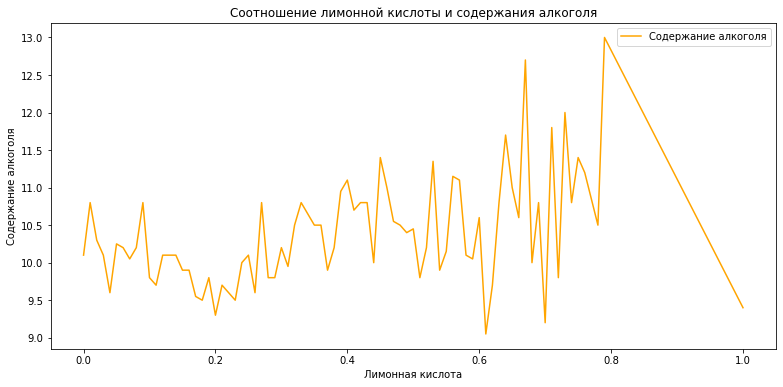

In [252]:
wine_acids.plot(title='Соотношение лимонной кислоты и содержания алкоголя',
                     xlabel='Лимонная кислота',
                     ylabel='Содержание алкоголя',
                     color='orange')

***Результат сравнения лимонной кислоты и алкоголя неоднозначен.***

Во-первых, естественно, прямой зависимости (как, например между количеством остаточного сахара и алкоголем) здесь быть и не может, поскольку сами кислоты на ферментацию и выработку спиртов не влияют от слова совсем. Тем не менее, некоторое увеличение алкоголя по мере увеличения колчества лимонной кислоты мы можем наблюдать.

Во-вторых, важно даже не столько само увеличение,сколько заметно расширяющийся диапазон разбросов, показывающий, что при высоком содержании лимонной кислоты вино может быть, как и слабоалкогольным, так и относительно сильноалкогольным.

*******

**Чем ниже кислотность,тем выше алкоголь**

Взаимосвязь "высокий алкоголь => высокий сахар => низкая кислотность" неплохо продемонстрирована на графике ниже. При этом, вино с высокой кислотностью и высоким значением алоголя нельзя считать выбросом, поскольку такое случается. Ну и потом, "высокий уровень алкоголя" понятие достаточно условное, поскольку показатель 14,9 (максимальный в данной выборке) вполне характерен и для очень сухих вин. 

Надо отметить, что в выборке 67,4% приходится на белые вина и только 32,6% на красные. А по статистике, белые вина обладают большей кислотностью. Кроме того, выборка производиласьн основе анализа вн португальской винодельни "Vino Verde", а регион Португалии в принципе не отличается избыточным количеством тепла и солнца (по сравнению, например, с югом Италии или Греции), что опять же приводит к выводу, что в выборке не может бытьслишком крепких и слишком сладких вин. 

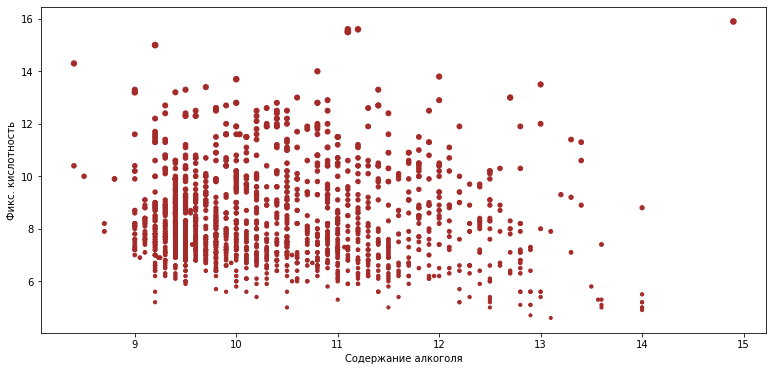

In [253]:
wine.plot(kind='scatter',
                 x='Содержание алкоголя',
                 y='Фикс. кислотность',
         s=wine['Фикс. кислотность']*2,
         color='brown')

**Показатель остаточного сахара**

Остаточный сахар - этот тот сахар, который остался в вине после того, как большая его часть благодаря ферментации превратилась в спирт.

Соответственно, высокий уровень остаточного сахара может говорить о том, что:

- вино молодое и процесс брожения еще не закончен.
- вино приготовлено из очень сладкого сахара и даже после завершения брожения его остаточный уровенькрайне высок (как правило, в таких случаях вино крепче и скорее всего относится к сладким и полусладким)
- процесс ферментации был принудительно остановлен вноделом на ранней стадии, чтобы получить одновременно малоалкогольное и сладковатое вино (такое характерно для немецких рислингов)
Поскольку, как уже писалось выше, мы рассматриваем португальские вина, по большей части, белые вина, результат на графике вполне закономерен и логичен. 

на графике также предствлена линия, демонстирующая регрессию уровня остаточного сахара в процессе повышения градуса вина. 

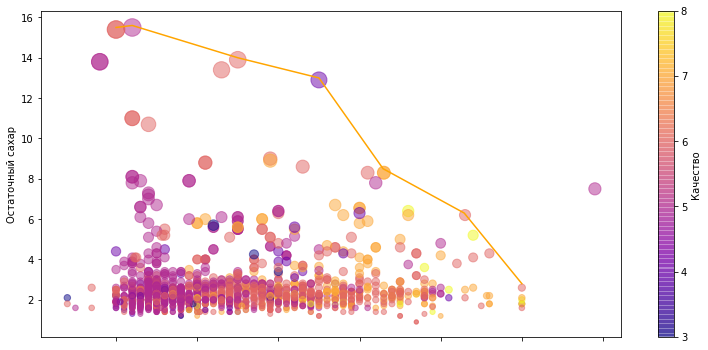

In [254]:
wine.plot(kind='scatter',
                 x='Содержание алкоголя',
                 y='Остаточный сахар',
         s=wine['Остаточный сахар']*20,
         c = 'Качество',# колонка, по которой будет делаться градиент цветовой гаммы. туда можно сунуть индекс колонки 
         cmap='plasma',
         alpha=0.5)

plt.plot([9, 9.2, 10.5, 11.5, 12.29, 13.29, 14],[15.5, 15.6, 14, 13, 8.5, 6.3, 2.8], color='orange')

На графике ***выше*** цветовая палитра применяется в зависимости изменения оценок

.... и это дает нам возможность увидеть, что эксперты как-то не очень любят сладкие вина.

********

**Посмотрим на распределение оценок.**

... и увидим, что эксперты чаще всего выставляли 5, 6 и 7. При этом, выше 8 при заявленном диапазоне до 10 оценок вообще нет. Подозреваю, что исследуемые вина были из среднеценовой категории (вообще, насколько я понимаю, Vino Verde - как раз среднеценовая категория. Такой уверенный середнячок). К сожалению, в данной выбокрке не представляется воозможности сделать разбивку отдельно по красным и белым винам, поскольку было бы инересно посмотреть распределение оценок именно по этому признаку.

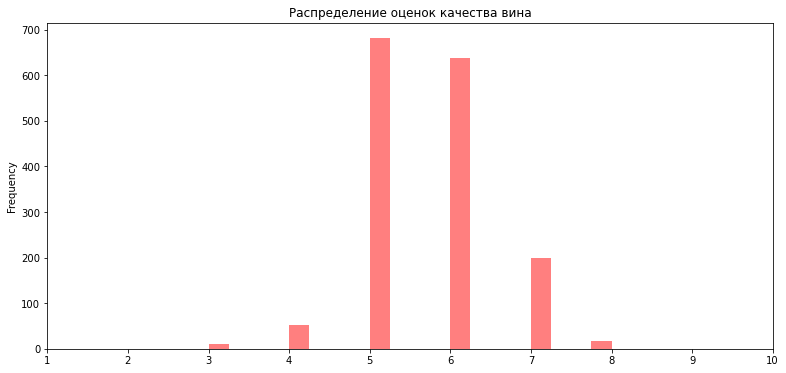

In [257]:
wine['Качество'].plot(kind='hist', 
                     bins=20,
                     title='Распределение оценок качества вина',
                     xticks=range(1, 11), color ='red', alpha=0.5)

**Лимонная кислота к уровню фиксированной кислотности**

Лимонная кислота входит в число фиксированных (нелетучих) кислот, но кроме нее туда также входят молочная, яблочная,  янтарная и др. Поскольку мы не можем в рамках данной выборки собрать полноценный набор всех кислот, входящих в фиксированную кислотность, будем сравнивать лимонную кислоту с фиксированной кислотностью

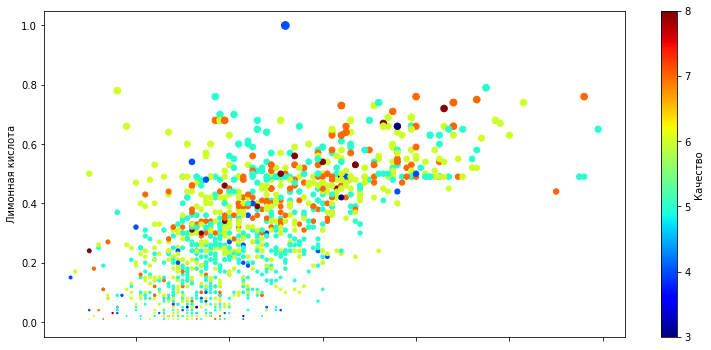

In [258]:
wine.plot(kind='scatter',
                 x='Фикс. кислотность',
                 y='Лимонная кислота',
          c = 'Качество',
          s = wine['Лимонная кислота']*60,
          cmap='jet')

Интересно, что, согласно графику выше, качество вина (самые теплые тона, включая самый "горячий" коричневый) раастет относительно равномерно с повышенимем уровня кислот.

**Взаимосвязь между оценками и алкоголем** 

***Пробуем разные графики, используем boxplot***

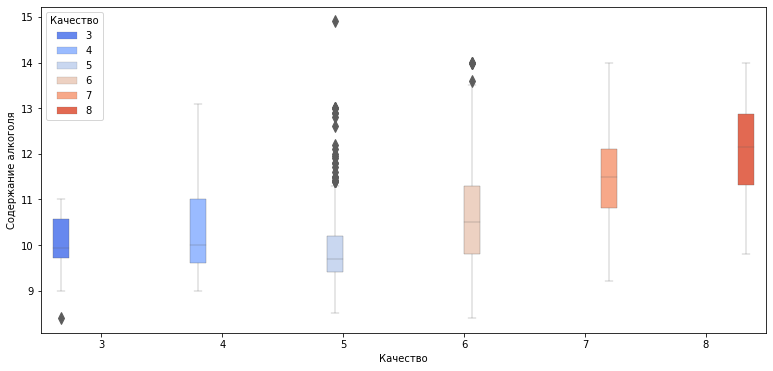

In [259]:
sns.boxplot(data=wine, x="Качество", y="Содержание алкоголя", hue='Качество', palette='coolwarm', saturation=8,
            linewidth=0.3,
            fliersize=8)

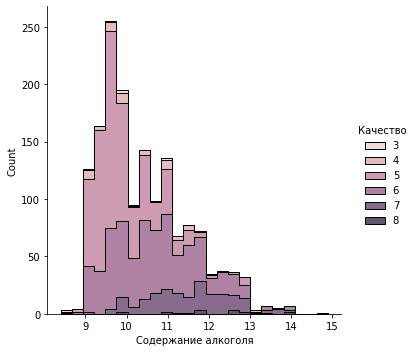

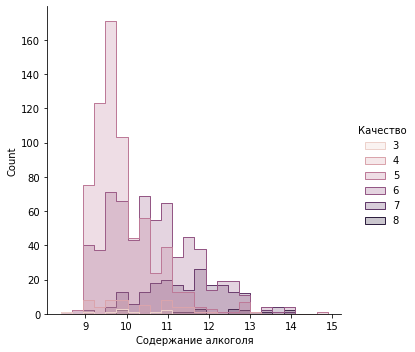

In [260]:
wx = sns.displot(wine, x=wine['Содержание алкоголя'], element="step", hue='Качество', multiple="stack")
ax = sns.displot(wine, x='Содержание алкоголя', element="step", hue='Качество')

А дальше из серии **"ничего не понятно, но очень интересно":**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


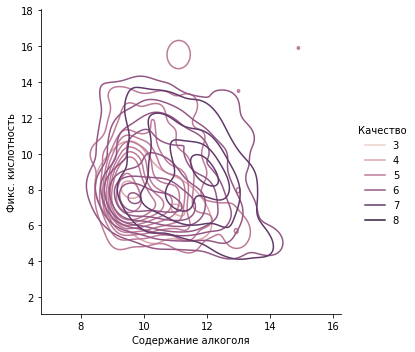

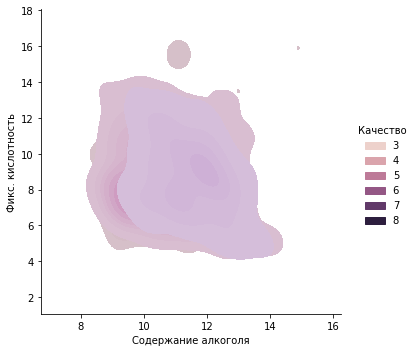

In [261]:
wc = sns.displot(wine, x='Содержание алкоголя', y="Фикс. кислотность", kind="kde", hue='Качество', fill=False)
wf = sns.displot(wine, x='Содержание алкоголя', y="Фикс. кислотность", kind="kde", hue='Качество', fill=True)

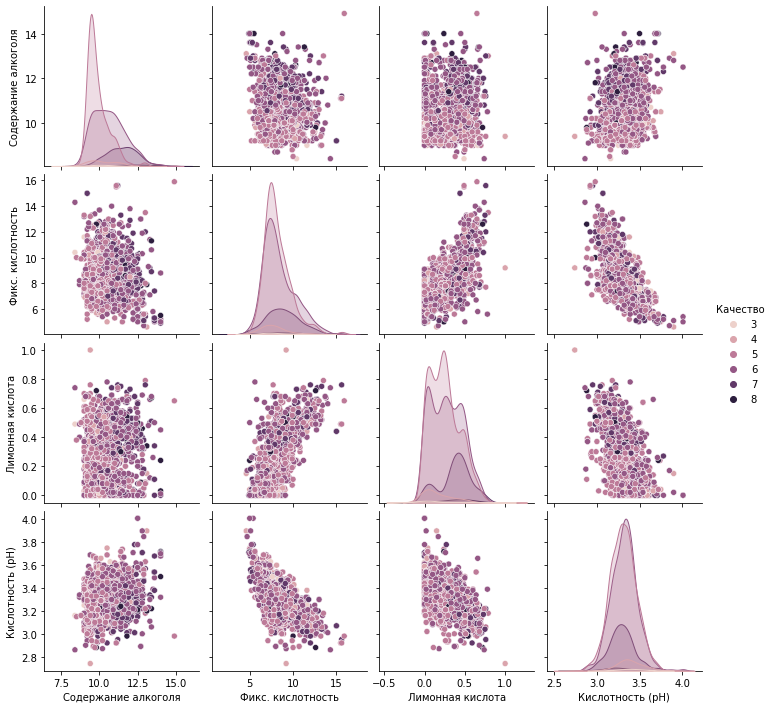

In [262]:
sns.pairplot(wine[['Содержание алкоголя', 'Фикс. кислотность', 'Лимонная кислота', 'Кислотность (pH)', 'Качество']], hue='Качество')